# 1. Data Gathering

In [1]:
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import re
import requests
import tweepy as tw
import json
%matplotlib inline

In [2]:
# contents of the archive file
archive = pd.read_csv('twitter-archive-enhanced.csv')
archive.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None


In [3]:
# URL of the tsv file downloaded and put in the same directory folder in use

url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
resp = requests.get(url, stream = True)
with open('image_predictions.tsv','wb') as f:  # Saving received content as a tsv file in binary format
     
    # write the contents of the response (resp.content)
    # to a new file in binary mode.
    f.write(resp.content)

images = pd.read_csv('image_predictions.tsv', sep='\t')
images.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [4]:
# https://www.earthdatascience.org/courses/use-data-open-source-python/intro-to-apis/twitter-data-in-python/

In [5]:
consumer_key= ' DELETED' # API Key
consumer_secret= 'DELETED' #API Secret
access_token= 'DELETED'# Access Token
access_token_secret= 'DELETED' #Access Token Secret

auth = tw.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tw.API(auth, 
             parser = tw.parsers.JSONParser(),
             wait_on_rate_limit=True)

In [6]:
# Fetch tweets from the twitter API using the following loop:
list_of_tweets = []
# Tweets that can't be found are saved in the list below:
cant_find_tweets_for_those_ids = []

for tweet_id in archive['tweet_id']:   
    try:
        list_of_tweets.append(api.get_status(tweet_id))
    except Exception as e:
        cant_find_tweets_for_those_ids.append(tweet_id)

Rate limit reached. Sleeping for: 186
Rate limit reached. Sleeping for: 142


In [7]:
print("The number of tweets found" ,len(list_of_tweets)) # should be 2325
print("The number of tweets not found" , len(cant_find_tweets_for_those_ids))

The number of tweets found 2325
The number of tweets not found 31


In [8]:
#Then in this code block we isolate the json part of each tweepy 
#status object that we have downloaded and we add them all into a list

my_list_of_dicts = []
for each_json_tweet in list_of_tweets:
    my_list_of_dicts.append(each_json_tweet)

In [9]:
# Write tweet data to json file
with open('tweet_json.txt', 'w') as file:
        file.write(json.dumps(my_list_of_dicts, indent=4))

In [10]:
# saving json file as csv
api_tweets = pd.read_json("tweet_json.txt")
api_tweets.to_csv("tweet.csv", index=False)

In [11]:
# load the csv file to confirm
api_data = pd.read_csv("tweet.csv")
api_data.head(2)

,created_at,id,id_str,text,truncated,entities,extended_entities,source,in_reply_to_status_id,in_reply_to_status_id_str,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only eve...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,...,32866,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
1,2017-08-01 00:17:27+00:00,892177421306343426,892177421306343424,This is Tilly. She's just checking pup on you....,True,"{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,"<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,...,28392,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN


# 2. Assessing Data

## Identify problems in the data by assessing visually and programmatically for quality and tidiness issues.

Data Quality Dimensions;

    1. Completness - The degree to which the data contains all desired components or measures
    2. Validity - The degree to which the data conforms to a defined schema
    3. Accuracy - The degree to which the data conforms to the actual entity being measured or described
    4. Consistency - The degree to which the data is repeatable from different points of entry or collection
    
 Tidiness - it requires;
 
     1. Each variable forms a column
     2. Each observation forms a row
     3. Each type of observation unit forms a table
     
    We have 3 files; archive, images and api data
    Visually i used Ms Excel to assess and programmatically i will use Python

## 2a. Visual assessment of the three files

In [12]:
archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

 **Insights:**  
    
    Some Columns have missing values
    Some columns have mismatched datatypes eg timestamp needs to be datetime
    Some Columns need to be placed as one ie doggo,floofer,pupper,puppo
    Some Columns are redundant i.e not needed for the analysis

In [13]:
archive.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None


**Insights:**

As i can't display the whole dataframe to visually assess, i used Ms Ecxel and these were my findings;

    1. In the text column, those starting with RT are retweets and need to be addressed. 
    Some texts ie tweets are just conversations with no ratings
    2. The text column has extra urls
    3. In the Name column, some values like,'None' and 'a' as names, points to its accuracy. This won't be cleaned though.
    4. The rating numerator and denometor column, some have more than 10. We'll assess more programmatically so as
    to standardize for cosistency.

In [14]:
images.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


**Insight:

    There are 2356 tweets in the archive file and their are 2075 images depicting 281 missing rows
    i.e some tweets don't have images

In [15]:
images.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


**Insights**
With a more visual view, i imported the file into Excel and this was my finding;

    1. p1,p2,p3 values are inconsistent, some start with capital letters others small letters. This needs to be addressed.
    2. Column names need to be more descriptive
    3. p1, p2, p3 can be merged to one prediction column based on the true values of p1_dog, p2_dog and p3_dog. 
    P1_conf, p2_conf,P3_config can also be merged to one column to align with the confidence level of the predictions.

In [16]:
api_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2325 entries, 0 to 2324
Data columns (total 30 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   created_at                     2325 non-null   object 
 1   id                             2325 non-null   int64  
 2   id_str                         2325 non-null   int64  
 3   text                           2325 non-null   object 
 4   truncated                      2325 non-null   bool   
 5   entities                       2325 non-null   object 
 6   extended_entities              1812 non-null   object 
 7   source                         2325 non-null   object 
 8   in_reply_to_status_id          77 non-null     float64
 9   in_reply_to_status_id_str      77 non-null     float64
 10  in_reply_to_user_id            77 non-null     float64
 11  in_reply_to_user_id_str        77 non-null     float64
 12  in_reply_to_screen_name        77 non-null     o

**Insight:**

    - There are 2356 tweets in the archive data and 2325 in the api data depicting 31 missing rows
    - Only the id, retweet_count and favorite_count are needed for this analysis, the rest will be dropped
    - id column to be renamed as tweet_id
    

## 2b Assessing the three files programmatically

### 1. Archive File

In [17]:
#Checking duplicates
archive.duplicated().sum()

0

In [18]:
#Confirming duplicates for tweet id
archive.tweet_id.duplicated().sum()

0

In [19]:
#Checking for original tweets
archive.retweeted_status_id.isnull().sum()

2175

**Insight:**

    Out of the 2356, 2175 are original tweets and 181 are retweets (duplicates)

In [20]:
# Confirming re-tweets 
archive.retweeted_status_id.notnull().sum()

181

In [21]:
archive.rating_denominator.value_counts()

10     2333
11        3
50        3
20        2
80        2
70        1
7         1
15        1
150       1
170       1
0         1
90        1
40        1
130       1
110       1
16        1
120       1
2         1
Name: rating_denominator, dtype: int64

10 is the standard rating denomenator, other numbers could be wrongly typed or misinterprated

In [22]:
archive.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
2         9
1         9
75        2
15        2
420       2
0         2
80        1
144       1
17        1
26        1
20        1
121       1
143       1
44        1
60        1
45        1
50        1
99        1
204       1
1776      1
165       1
666       1
27        1
182       1
24        1
960       1
84        1
88        1
Name: rating_numerator, dtype: int64

Some extreme values such 1776, 960, 666 etc could be misstyped, wrongly captured 

In [23]:
# Checking for Null Values
archive.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [24]:
# Check values for doggo,floofer,pupper and puppo
print('Doggo Values are:',archive.doggo.unique())
print('Floofer Values are:',archive.floofer.unique())
print('Pupper Values are:',archive.pupper.unique())
print('Puppo Values are:',archive.puppo.unique())

Doggo Values are: ['None' 'doggo']
Floofer Values are: ['None' 'floofer']
Pupper Values are: ['None' 'pupper']
Puppo Values are: ['None' 'puppo']


### 2. Images File

In [25]:
images.head(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [26]:
# missing rows
len(archive) - len(images)

281

In [27]:
#Check duplicates in jpg_url as same url means duplicated data
images['jpg_url'].duplicated().sum()

66

In [28]:
#Checking for Null values
images.isnull().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

In [29]:
# Check values for P1,P2,P3 dog
print('P1 Dog Values are:',images.p1_dog.unique())
print('P2 Dog Values are:',images.p2_dog.unique())
print('P3 Dog Values are:',images.p3_dog.unique())

P1 Dog Values are: [ True False]
P2 Dog Values are: [ True False]
P3 Dog Values are: [ True False]


### 3. Api Data File

In [30]:
api_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2325 entries, 0 to 2324
Data columns (total 30 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   created_at                     2325 non-null   object 
 1   id                             2325 non-null   int64  
 2   id_str                         2325 non-null   int64  
 3   text                           2325 non-null   object 
 4   truncated                      2325 non-null   bool   
 5   entities                       2325 non-null   object 
 6   extended_entities              1812 non-null   object 
 7   source                         2325 non-null   object 
 8   in_reply_to_status_id          77 non-null     float64
 9   in_reply_to_status_id_str      77 non-null     float64
 10  in_reply_to_user_id            77 non-null     float64
 11  in_reply_to_user_id_str        77 non-null     float64
 12  in_reply_to_screen_name        77 non-null     o

In [31]:
# missing rows
len(archive) - len(api_data)

31

In [32]:
#Checking for Null in the Columns to be used in analysis
print('Id Count: ',api_data.id.isnull().sum())
print('Retweet Count: ',api_data.retweet_count.isnull().sum())
print('Favorite Count: ',api_data.favorite_count.isnull().sum())

Id Count:  0
Retweet Count:  0
Favorite Count:  0


In [33]:
# Checking for duplicate Id
api_data.id.duplicated().sum()

0

## Summary

### Quality Issues

#### Archive File
    1. Some rows are retweets not original tweets
    2. Datatype missmatch need to be corrected i.e timestamp
    3. Redundant Columns i.e not needed for analysis, need to be dropped
    4. NaNs represented as 'None' (str) for name, doggo, floofer, pupper, and puppo columns need to be rectified.
    5. The rating numerator and denometor columns need standardization
    6. Extra urls in the text column
    7. Name column values need standardisation
    
 #### Image Prediction File
     1. There are some missing rows in images dataset (2075 rows instead of 2356): 
     either the rows are missing or some tweets didn't have dog images
     2. There are duplicated jpg_url's 
     3. Redundant Columns i.e not needed for analysis, need to be dropped
     4. Column names are non-descriptive
 
 #### Api Data File
     1. There are some missing rows in the Api Dataset (2323 rows instead of 2356)
     2. id column to be renamed as tweet_id
     3. Only the id, retweet_count and favorite_count are needed for this analysis, the rest will be dropped
    
    
### Tidiness Issues

    1. The doggo, puppo, pupper and floofer columns for dog stages in the twitter_archive table are in seperate columns instead 
    of a single column
    2. p1, p2, p3 can be merged to one prediction column based on the true values of p1_dog, p2_dog and p3_dog. 
    P1_conf, p2_conf,P3_config can also be merged to one column to align with the confidence level of the predictions.
    3. All three datasets need to be joined into one.

# 3. Cleaning Data

In [34]:
#Creating copies of dataset
archive_clean = archive.copy()
images_clean = images.copy()
api_data_clean = api_data.copy()

I will tackle 8 quality issues and 2 tiddiness issues. I will merge the tables to make tackling content quality issues easier. Inorder to merge the tables, i need to tackle a few quality issues to enable merging to happen.

### Quality issue 1: Changing Column names

#### DEFINE: Column name change

Change Api Data Dataset 'Id' Column to 'Tweet_id' so as to merge with the other datasets

#### CODE

In [35]:
api_data_clean.rename(columns = {'id':'tweet_id'}, inplace=True)

#### TEST

In [36]:
api_data_clean.columns

Index(['created_at', 'tweet_id', 'id_str', 'text', 'truncated', 'entities',
       'extended_entities', 'source', 'in_reply_to_status_id',
       'in_reply_to_status_id_str', 'in_reply_to_user_id',
       'in_reply_to_user_id_str', 'in_reply_to_screen_name', 'user', 'geo',
       'coordinates', 'place', 'contributors', 'is_quote_status',
       'retweet_count', 'favorite_count', 'favorited', 'retweeted',
       'possibly_sensitive', 'possibly_sensitive_appealable', 'lang',
       'retweeted_status', 'quoted_status_id', 'quoted_status_id_str',
       'quoted_status'],
      dtype='object')

### Quality issue 2: Dropping Re-tweets
#### DEFINE: 
Dropping re-tweets by picking the values that are not null in retweeted status id

#### CODE

In [37]:
archive_clean = archive_clean[archive_clean['retweeted_status_id'].isnull()]

#### TEST

In [38]:
archive_clean['retweeted_status_id'].unique()

array([nan])

In [39]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2175 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2175 non-null   object 
 4   source                      2175 non-null   object 
 5   text                        2175 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               2117 non-null   object 
 10  rating_numerator            2175 non-null   int64  
 11  rating_denominator          2175 non-null   int64  
 12  name                        2175 non-null   object 
 13  doggo                       2175 

### Quality issue 3: Duplications

#### DEFINE: duplicated jpg_url's 
Droping the duplicated jpg urls using drop_duplicates() function

#### CODE

In [40]:
# Check the duplicated rows
images_clean['jpg_url'].duplicated().sum()

66

In [41]:
#drop duplicates
images_clean.drop_duplicates(subset=['jpg_url'], keep='last', inplace=True)

#### TEST

In [42]:
images_clean['jpg_url'].duplicated().sum()

0

### Tidiness issue 1a: Form one Column 

#### DEFINE: 
Columns 'doggo', 'floofer', 'pupper', 'puppo' in archive dataset should be a single column stage. To do this i will use the aggreagate function to combine them into one.

#### CODE

In [43]:
#replace all the 'None' before aggregating

archive_clean.iloc[:,13:17] = archive_clean.iloc[:,13:17].replace('None' , '')

In [44]:
# Combine the colums using aggregate function

archive_clean['dog_stages'] = archive_clean.iloc[:,13:17].agg(''.join, axis=1)

In [45]:
#Delete the old columns

list = ['doggo', 'floofer', 'pupper','puppo']
archive_clean.drop(list,axis=1,inplace=True)

In [46]:
# Replace all the empty values with NaN
archive_clean['dog_stages'] = archive_clean['dog_stages'].replace('' , np.nan)

#### TEST

In [47]:
archive_clean.dog_stages.unique()

array([nan, 'doggo', 'puppo', 'pupper', 'floofer', 'doggopuppo',
       'doggofloofer', 'doggopupper'], dtype=object)

In [48]:
archive_clean.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'dog_stages'],
      dtype='object')

### Tidiness issue 1b: Form one Column 

#### DEFINE:
    Making p1, p2, p3 to form one prediction column based on the first true values of p1_dog, p2_dog and p3_dog. 
    Making P1_conf, p2_conf,P3_config to one column to align with the confidence level of the predictions.

#### CODE

In [49]:
#the first true prediction (p1, p2 or p3) and their aligned confidence level will be store in these lists
dog_breed = []
confidence_level = []

#create a function with nested if to capture the dog breed and confidence level
# from the first 'true' prediction
def image(images_clean):
    if images_clean['p1_dog'] == True:
        dog_breed.append(images_clean['p1'])
        confidence_level.append(images_clean['p1_conf'])
    elif images_clean['p2_dog'] == True:
        dog_breed.append(images_clean['p2'])
        confidence_level.append(images_clean['p2_conf'])
    elif images_clean['p3_dog'] == True:
        dog_breed.append(images_clean['p3'])
        confidence_level.append(images_clean['p3_conf'])
    else:
        dog_breed.append('Error')
        confidence_level.append('Error')

#series objects having index the image_clean column.        
images_clean.apply(image, axis=1)

#create new columns
images_clean['dog_breed'] = dog_breed
images_clean['confidence_level'] = confidence_level

In [50]:
#confirm new columns
images_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2009 entries, 0 to 2074
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   tweet_id          2009 non-null   int64  
 1   jpg_url           2009 non-null   object 
 2   img_num           2009 non-null   int64  
 3   p1                2009 non-null   object 
 4   p1_conf           2009 non-null   float64
 5   p1_dog            2009 non-null   bool   
 6   p2                2009 non-null   object 
 7   p2_conf           2009 non-null   float64
 8   p2_dog            2009 non-null   bool   
 9   p3                2009 non-null   object 
 10  p3_conf           2009 non-null   float64
 11  p3_dog            2009 non-null   bool   
 12  dog_breed         2009 non-null   object 
 13  confidence_level  2009 non-null   object 
dtypes: bool(3), float64(3), int64(2), object(6)
memory usage: 194.2+ KB


In [51]:
#drop rows that has prediction_list 'error'
images_clean = images_clean[images_clean['dog_breed'] != 'Error']


#### TEST

In [52]:
#confirm 
images_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1691 entries, 0 to 2073
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   tweet_id          1691 non-null   int64  
 1   jpg_url           1691 non-null   object 
 2   img_num           1691 non-null   int64  
 3   p1                1691 non-null   object 
 4   p1_conf           1691 non-null   float64
 5   p1_dog            1691 non-null   bool   
 6   p2                1691 non-null   object 
 7   p2_conf           1691 non-null   float64
 8   p2_dog            1691 non-null   bool   
 9   p3                1691 non-null   object 
 10  p3_conf           1691 non-null   float64
 11  p3_dog            1691 non-null   bool   
 12  dog_breed         1691 non-null   object 
 13  confidence_level  1691 non-null   object 
dtypes: bool(3), float64(3), int64(2), object(6)
memory usage: 163.5+ KB


### Quality issue 4: Dropping Columns not needed

#### DEFINE:Drop columns in all three tables that are not needed for analysis

Since their are many columns to be dropped, i used the column drop difference parameter to retain the columns needed

#### CODE

In [53]:
# Drop columns for archive dataset and api data dataset

archive_clean.drop(archive_clean.columns.difference(['tweet_id', 'timestamp', 'text','rating_numerator', 'rating_denominator', 'name','dog_stages']),axis = 1, inplace = True)
api_data_clean.drop(api_data_clean.columns.difference(['tweet_id', 'favorite_count', 'retweet_count']),axis = 1, inplace = True)
images_clean.drop(images_clean.columns.difference(['tweet_id', 'jpg_url', 'dog_breed', 'confidence_level']),axis = 1, inplace = True)

#### TEST

In [54]:
print(archive_clean.info())
print(api_data_clean.info())
print(images_clean.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2175 non-null   int64 
 1   timestamp           2175 non-null   object
 2   text                2175 non-null   object
 3   rating_numerator    2175 non-null   int64 
 4   rating_denominator  2175 non-null   int64 
 5   name                2175 non-null   object
 6   dog_stages          344 non-null    object
dtypes: int64(3), object(4)
memory usage: 135.9+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2325 entries, 0 to 2324
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2325 non-null   int64
 1   retweet_count   2325 non-null   int64
 2   favorite_count  2325 non-null   int64
dtypes: int64(3)
memory usage: 54.6 KB
None
<class 'pandas.core.frame.DataFrame'>
In

### Tidiness issue 2: Joining the 3 datasets

#### DEFINE
Joining the three dataset using merge() function

#### CODE

In [55]:
#Merge archive dataset to images dataset
merged = pd.merge(archive_clean, 
                      images_clean, 
                      how = 'left', on = ['tweet_id'])


In [56]:
#Merge with api data dataset
twitter = pd.merge(merged, api_data_clean, 
                      how = 'left', on = ['tweet_id'])

In [57]:
#confirm
twitter.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2174
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            2175 non-null   int64  
 1   timestamp           2175 non-null   object 
 2   text                2175 non-null   object 
 3   rating_numerator    2175 non-null   int64  
 4   rating_denominator  2175 non-null   int64  
 5   name                2175 non-null   object 
 6   dog_stages          344 non-null    object 
 7   jpg_url             1626 non-null   object 
 8   dog_breed           1626 non-null   object 
 9   confidence_level    1626 non-null   object 
 10  retweet_count       2167 non-null   float64
 11  favorite_count      2167 non-null   float64
dtypes: float64(2), int64(3), object(7)
memory usage: 220.9+ KB


In [58]:
#keep rows that have picture (jpg_url) and retweet counts
twitter = twitter[twitter['jpg_url'].notnull()]
twitter = twitter[twitter['retweet_count'].notnull()]

#### TEST

In [59]:
twitter.head()

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,dog_stages,jpg_url,dog_breed,confidence_level,retweet_count,favorite_count
1,892177421306343426,2017-08-01 00:17:27 +0000,This is Tilly. She's just checking pup on you....,13,10,Tilly,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Chihuahua,0.323581,5174.0,28392.0
2,891815181378084864,2017-07-31 00:18:03 +0000,This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,NaN,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,Chihuahua,0.716012,3415.0,21337.0
3,891689557279858688,2017-07-30 15:58:51 +0000,This is Darla. She commenced a snooze mid meal...,13,10,Darla,NaN,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,Labrador_retriever,0.168086,7078.0,35820.0
4,891327558926688256,2017-07-29 16:00:24 +0000,This is Franklin. He would like you to stop ca...,12,10,Franklin,NaN,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,basset,0.555712,7584.0,34259.0
5,891087950875897856,2017-07-29 00:08:17 +0000,Here we have a majestic great white breaching ...,13,10,None,NaN,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,Chesapeake_Bay_retriever,0.425595,2544.0,17237.0


In [60]:
#confirm
twitter.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1619 entries, 1 to 2174
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            1619 non-null   int64  
 1   timestamp           1619 non-null   object 
 2   text                1619 non-null   object 
 3   rating_numerator    1619 non-null   int64  
 4   rating_denominator  1619 non-null   int64  
 5   name                1619 non-null   object 
 6   dog_stages          251 non-null    object 
 7   jpg_url             1619 non-null   object 
 8   dog_breed           1619 non-null   object 
 9   confidence_level    1619 non-null   object 
 10  retweet_count       1619 non-null   float64
 11  favorite_count      1619 non-null   float64
dtypes: float64(2), int64(3), object(7)
memory usage: 164.4+ KB


### Quality issue 5: Datatype missmatch

#### DEFINE:
Change Timestamp from object to DateTime and timezone-aware then split it into year, month and day columns and drop the timestamp column

#### CODE

In [61]:
#Change datatype
twitter.timestamp = pd.to_datetime(twitter.timestamp).astype('datetime64[ns, UTC]')

#### TEST

In [62]:
twitter.timestamp.dtype

datetime64[ns, UTC]

#### CODE

In [63]:
#extract year, month and day to new columns
twitter['year'] = twitter['timestamp'].dt.year
twitter['month'] = twitter['timestamp'].dt.month
twitter['day'] = twitter['timestamp'].dt.day

#Finally drop timestamp column
twitter = twitter.drop(columns='timestamp', axis=1)

#### TEST

In [64]:
twitter.columns

Index(['tweet_id', 'text', 'rating_numerator', 'rating_denominator', 'name',
       'dog_stages', 'jpg_url', 'dog_breed', 'confidence_level',
       'retweet_count', 'favorite_count', 'year', 'month', 'day'],
      dtype='object')

### Quality issue 6: Column value standardization 

#### DEFINE: Make Dog Breed and Name values consistent by making them all start with Capital Letters 

#### CODE

In [65]:
twitter['dog_breed'] = twitter.dog_breed.str.capitalize()
twitter['name'] = twitter.name.str.capitalize()

#### TEST 

In [66]:
print(twitter.dog_breed.head(3))
print(twitter.name.sample(3))

1             Chihuahua
2             Chihuahua
3    Labrador_retriever
Name: dog_breed, dtype: object
699     Glenn
1469    Buddy
2155     None
Name: name, dtype: object


### Quality Issue 7: Removing the extra url in text column

#### DEFINE:
Removing the extra urls in the text column for easy readability of the text

#### CODE

In [67]:
twitter['text'] = twitter['text'].replace(r'https://t\.co/[a-zA-Z0-9-.]+', '', regex = True)

#### TEST

In [68]:
twitter['text']

1       This is Tilly. She's just checking pup on you....
2       This is Archie. He is a rare Norwegian Pouncin...
3       This is Darla. She commenced a snooze mid meal...
4       This is Franklin. He would like you to stop ca...
5       Here we have a majestic great white breaching ...
                              ...                        
2170    Here we have a 1949 1st generation vulpix. Enj...
2171    This is a purebred Piers Morgan. Loves to Netf...
2172    Here is a very happy pup. Big fan of well-main...
2173    This is a western brown Mitsubishi terrier. Up...
2174    Here we have a Japanese Irish Setter. Lost eye...
Name: text, Length: 1619, dtype: object

### Quality issue 8: Standardizing the ratings

#### DEFINE: A) Rating Denominator

The Standardized denominator is 10, i'll access why some are not 10 and rectify. For the numerator, i'll rectify the extreame values

#### CODE 

In [69]:
pd.options.display.max_colwidth = 1000
trial = twitter.query('rating_denominator != 10')
trial[['tweet_id','text','rating_numerator','rating_denominator']]

,tweet_id,text,rating_numerator,rating_denominator
363,820690176645140481,The floofs have been released I repeat the floofs have been released. 84/70,84,70
429,810984652412424192,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\n,24,7
733,758467244762497024,Why does this never happen at my front door... 165/150,165,150
890,740373189193256964,"After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP",9,11
987,722974582966214656,Happy 4/20 from the squad! 13/10 for all,4,20
1024,716439118184652801,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10,50,50
1050,713900603437621249,Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody,99,90
1075,710658690886586372,Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80,80,80
1095,709198395643068416,"From left to right:\nCletus, Jerome, Alejandro, Burp, &amp; Titson\nNone know where camera is. 45/50 would hug all at once",45,50
1172,704054845121142784,Here is a whole flock of puppers. 60/50 I'll take the lot,60,50


    index 890, 987, 1024, 1483 and 2154 have actual denominator as 10, but was analyzed incorrectly due to the presence of
    another fraction in the text that was picked first. The numerator is also wrongly indicated. 

    index 363, 429 , 733 are not rating tweets

    These tweets with denominator not equal to 10 are multiple dogs. Example index 1095 the rating is the sum of 5 dogs,
    index 1050 is of 9 dogs, index 1664 is of 8 dogs etc, which will be divided and rectified. index 1075 ,1172 , 1254, 
    1455, 1456, 1600 are also of multiple dogs.

In [70]:
# Adjusting denominator
twitter.loc[twitter.tweet_id == 740373189193256964, ['rating_denominator']] = 10
twitter.loc[twitter.tweet_id == 722974582966214656, ['rating_denominator']] = 10
twitter.loc[twitter.tweet_id == 716439118184652801, ['rating_denominator']] = 10
twitter.loc[twitter.tweet_id == 682962037429899265, ['rating_denominator']] = 10
twitter.loc[twitter.tweet_id == 666287406224695296, ['rating_denominator']] = 10
twitter.loc[twitter.tweet_id == 709198395643068416, ['rating_denominator']] = 10
twitter.loc[twitter.tweet_id == 713900603437621249, ['rating_denominator']] = 10
twitter.loc[twitter.tweet_id == 675853064436391936, ['rating_denominator']] = 10
twitter.loc[twitter.tweet_id == 710658690886586372, ['rating_denominator']] = 10
twitter.loc[twitter.tweet_id == 704054845121142784, ['rating_denominator']] = 10
twitter.loc[twitter.tweet_id == 697463031882764288, ['rating_denominator']] = 10
twitter.loc[twitter.tweet_id == 684225744407494656, ['rating_denominator']] = 10
twitter.loc[twitter.tweet_id == 684222868335505415, ['rating_denominator']] = 10
twitter.loc[twitter.tweet_id == 677716515794329600, ['rating_denominator']] = 10


In [71]:
# Drop non - rating tweets
twitter.drop(twitter[twitter['tweet_id'] == 820690176645140481].index, inplace = True)
twitter.drop(twitter[twitter['tweet_id'] == 810984652412424192].index, inplace = True)
twitter.drop(twitter[twitter['tweet_id'] == 758467244762497024].index, inplace = True)

In [72]:
# Adjusting numerator
twitter.loc[twitter.tweet_id == 740373189193256964, ['rating_numerator']] = 14
twitter.loc[twitter.tweet_id == 722974582966214656, ['rating_numerator']] = 13
twitter.loc[twitter.tweet_id == 716439118184652801, ['rating_numerator']] = 11
twitter.loc[twitter.tweet_id == 682962037429899265, ['rating_numerator']] = 10
twitter.loc[twitter.tweet_id == 666287406224695296, ['rating_numerator']] = 9
twitter.loc[twitter.tweet_id == 709198395643068416, ['rating_numerator']] = 9
twitter.loc[twitter.tweet_id == 713900603437621249, ['rating_numerator']] = 11
twitter.loc[twitter.tweet_id == 675853064436391936, ['rating_numerator']] = 11
twitter.loc[twitter.tweet_id == 710658690886586372, ['rating_numerator']] = 10
twitter.loc[twitter.tweet_id == 704054845121142784, ['rating_numerator']] = 12
twitter.loc[twitter.tweet_id == 697463031882764288, ['rating_numerator']] = 11
twitter.loc[twitter.tweet_id == 684225744407494656, ['rating_numerator']] = 11
twitter.loc[twitter.tweet_id == 684222868335505415, ['rating_numerator']] = 11
twitter.loc[twitter.tweet_id == 677716515794329600, ['rating_numerator']] = 12



#### TEST

In [73]:
twitter.rating_denominator.value_counts().sort_values()

10    1616
Name: rating_denominator, dtype: int64

#### DEFINE: B) Rating Numerator

#### CODE

In [74]:
twitter.rating_numerator.value_counts().sort_values()

75      1
0       1
27      1
26      1
2       2
3       5
4       6
5      14
6      16
14     22
7      31
8      68
9     134
13    209
11    348
10    353
12    404
Name: rating_numerator, dtype: int64

For the numerator i will clean the remaining extreame values which happen to be greater than 15. i'll display the text to see if they are wrongly captured.

In [75]:
pd.options.display.max_colwidth = 1000
trial2 = twitter.query('rating_numerator >= 15')
trial2[['tweet_id','text','rating_numerator','rating_denominator']]

,tweet_id,text,rating_numerator,rating_denominator
558,786709082849828864,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10",75,10
617,778027034220126208,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back,27,10
1533,680494726643068929,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10,26,10


    index 558, 617, 1533 are wrongly captured. 
    
    The above indexes correct numerators are in decimal, i'll check for all tweets with decimals in numerators
    and rectify all at once then round up to a whole number.

In [76]:
#Checking for decimals in the text to see if they match with the rating numerator

decimal = twitter[twitter['text'].str.contains(r"(\d+\.\d*\/\d+)")]
print(decimal[['tweet_id', 'rating_numerator', 'text']].values)

[[883482846933004288 5
  'This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 ']
 [786709082849828864 75
  "This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 "]
 [778027034220126208 27
  "This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back "]
 [680494726643068929 26
  'Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 ']]


C:\Users\Gladys\AppData\Local\Temp\ipykernel_11924\3253884297.py:3: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  decimal = twitter[twitter['text'].str.contains(r"(\d+\.\d*\/\d+)")]


In [77]:
#Adjusting the rating_numerators
twitter.loc[twitter.tweet_id == 786709082849828864, ['rating_numerator']] = 9.75
twitter.loc[twitter.tweet_id == 778027034220126208, ['rating_numerator']] = 11.27
twitter.loc[twitter.tweet_id == 680494726643068929, ['rating_numerator']] = 11.26
twitter.loc[twitter.tweet_id == 883482846933004288, ['rating_numerator']] = 13.50

In [78]:
#Round up to the nearest whole number

twitter.rating_numerator = twitter.rating_numerator.apply(np.ceil)

#### TEST

In [79]:
decimal = twitter[twitter['text'].str.contains(r"(\d+\.\d*\/\d+)")]
print(decimal[['tweet_id', 'rating_numerator', 'text']].values)

[[883482846933004288 14.0
  'This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 ']
 [786709082849828864 10.0
  "This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 "]
 [778027034220126208 12.0
  "This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back "]
 [680494726643068929 12.0
  'Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 ']]


C:\Users\Gladys\AppData\Local\Temp\ipykernel_11924\2160678690.py:1: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  decimal = twitter[twitter['text'].str.contains(r"(\d+\.\d*\/\d+)")]


In [80]:
twitter.rating_numerator.value_counts().sort_values()

0.0       1
2.0       2
3.0       5
4.0       6
5.0      13
6.0      16
14.0     23
7.0      31
8.0      68
9.0     134
13.0    209
11.0    348
10.0    354
12.0    406
Name: rating_numerator, dtype: int64

#### DEFINE:
Add new 'rating' column by dividing rating_numerator by rating_denominator

#### CODE

In [81]:
# Adding rating column
twitter['rating'] = twitter['rating_numerator'] / twitter['rating_denominator']


#### TEST

In [82]:
twitter['rating']

1       1.3
2       1.2
3       1.3
4       1.2
5       1.3
       ... 
2170    0.5
2171    0.6
2172    0.9
2173    0.7
2174    0.8
Name: rating, Length: 1616, dtype: float64

#### DEFINE
Drop the rating numerator and rating denominator columns

#### CODE

In [83]:
twitter = twitter.drop(columns=['rating_numerator', 'rating_denominator'], axis=1)

#### TEST

In [84]:
twitter.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1616 entries, 1 to 2174
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   tweet_id          1616 non-null   int64  
 1   text              1616 non-null   object 
 2   name              1616 non-null   object 
 3   dog_stages        251 non-null    object 
 4   jpg_url           1616 non-null   object 
 5   dog_breed         1616 non-null   object 
 6   confidence_level  1616 non-null   object 
 7   retweet_count     1616 non-null   float64
 8   favorite_count    1616 non-null   float64
 9   year              1616 non-null   int64  
 10  month             1616 non-null   int64  
 11  day               1616 non-null   int64  
 12  rating            1616 non-null   float64
dtypes: float64(3), int64(4), object(6)
memory usage: 176.8+ KB


### DATA STORAGE

In [85]:
twitter.to_csv('twitter_archive_master.csv', index=False)

## DATA ANALYSIS AND VISUALIZATION

The questions that will lead the analysis are;

    1. Which is the most owned breed?
    2. Is the most owned breed also the most favorited or retweeted breed?
    3. Is there a correlation between rating vs retweet counts? Retweet count vs favorite counts?
    4. What is the common dog stage?
    5. Is the most common stage also the highest rated?
    

In [86]:
twitter = pd.read_csv('twitter_archive_master.csv')

#### Q1. Which is the most owned breed?

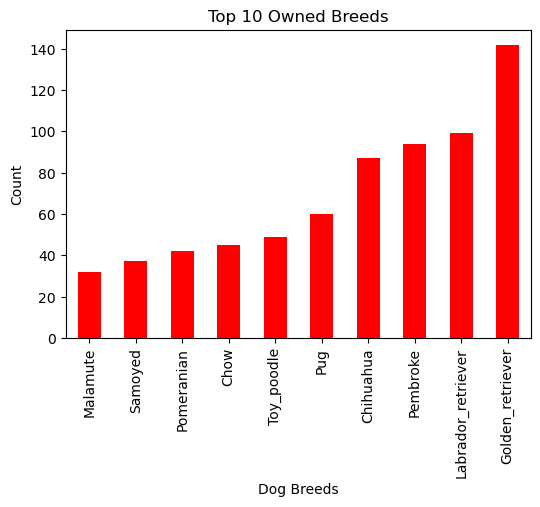

In [87]:
twitter['dog_breed'].value_counts()[:10].sort_values(ascending=True).plot(kind='bar', 
                                                                           figsize=(6,4),
                                                                           title='Top 10 Owned Breeds',
                                                                           color='red',
                                                                           xlabel='Dog Breeds',
                                                                           ylabel='Count');


**Insight:**

        Golden retriever is the most owned breed

#### Q2. Is the Golden retriever also the most favorited or retweeted dog breed?
#### DEFINE:
 
     This function takes in four parameters:

    twitter: DataFrame containing the twitter data
    num_breeds: Number of top dog breeds for which to plot the data
    column: Name of the column to plot
    plot_type: type of plot to create (default is 'bar', other options include 'line', 'area' etc)
    ascending: sort the diagram in ascending order or descending order (default is descending)

    It first extracts the top num_breeds dog breeds from the 'dog_breed' column, filters the dataframe to include only those
    breeds, then group the dataframe by the dog_breed column, calculate the mean of the provided column, then sort the 
    diagram based on the ascending parameter and finally it will plot the diagram based on the plot_type provided.

#### CODE

In [88]:
def plot_top_breeds(twitter, num_breeds, column, plot_type='bar', ascending=False):
    index = twitter['dog_breed'].value_counts().index.tolist()[0:num_breeds]
    filtered = twitter[twitter['dog_breed'].isin(index)]
    diagram = filtered.groupby(['dog_breed'])[column].mean()
    print(diagram.sort_values(ascending=ascending))
    if plot_type == 'bar':
        diagram.plot.bar(figsize=(6,4))
    else:
        diagram.plot(kind=plot_type, figsize=(6,4))

#### TEST

dog_breed
Samoyed               3187.702703
Golden_retriever      2640.894366
Labrador_retriever    2604.727273
Malamute              2595.312500
Pembroke              2310.053191
Pomeranian            2136.500000
Chow                  2092.422222
Toy_poodle            1743.979592
Chihuahua             1550.413793
Pug                   1366.800000
Name: retweet_count, dtype: float64


Text(0.5, 1.0, 'Dog Breeds and their Retweet Counts')

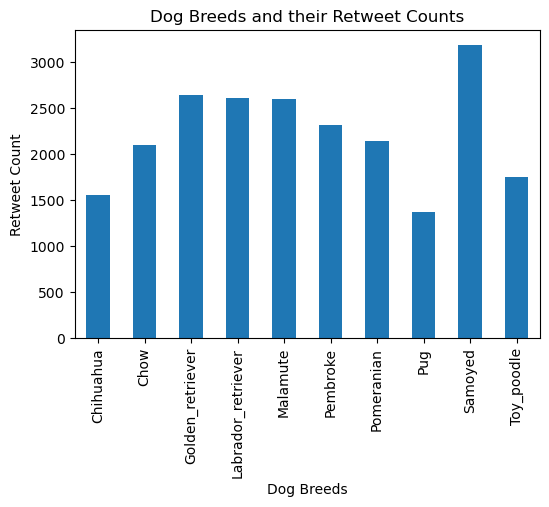

In [89]:
plot_top_breeds(twitter, 10, 'retweet_count')
plt.xlabel('Dog Breeds')
plt.ylabel('Retweet Count')
plt.title('Dog Breeds and their Retweet Counts')

dog_breed
Samoyed               10194.675676
Golden_retriever       9621.887324
Malamute               8900.625000
Labrador_retriever     8751.989899
Pembroke               8733.648936
Chow                   7731.800000
Pomeranian             6414.833333
Chihuahua              5576.045977
Toy_poodle             5368.693878
Pug                    4811.783333
Name: favorite_count, dtype: float64


Text(0.5, 1.0, 'Dog Breeds and their Favorite Counts')

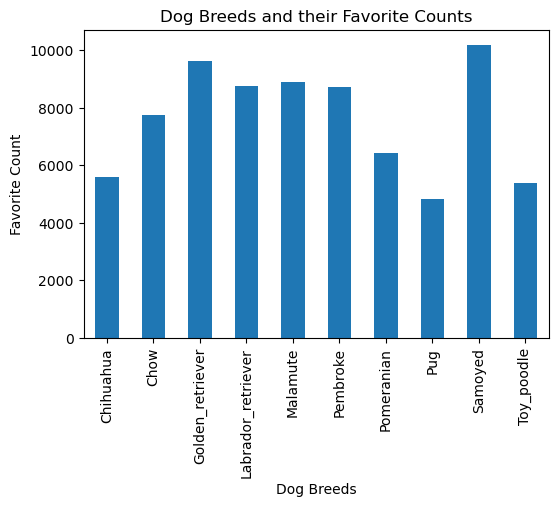

In [90]:
plot_top_breeds(twitter, 10, 'favorite_count')
plt.xlabel('Dog Breeds')
plt.ylabel('Favorite Count')
plt.title('Dog Breeds and their Favorite Counts')

**Insight:**

    Although the Golden retriever is the most owned, Samoyed breed seems to be the most liked and retweeted dog breed.

#### Q3. Is there a correlation between rating vs retweet counts? Retweet count vs favorite counts?
#### DEFINE:

    This function takes in four parameters:

    twitter: DataFrame containing the twitter data
    x_column: The name of the column to be plotted on the x-axis
    y_column: The name of the column to be plotted on the y-axis
    title: The title of the scatter plot
    
    It will create a scatter plot of twitter DataFrame with x_column on the x-axis and y_column on the y-axis. 
    It will also set the x-axis label, y-axis label and the title of the plot as passed in the parameters.

#### CODE

In [91]:
def plot_scatter(twitter, x_column, y_column, title):
    twitter.plot(x=x_column, y=y_column, kind='scatter')
    plt.xlabel(x_column)
    plt.ylabel(y_column)
    plt.title(title)

#### TEST

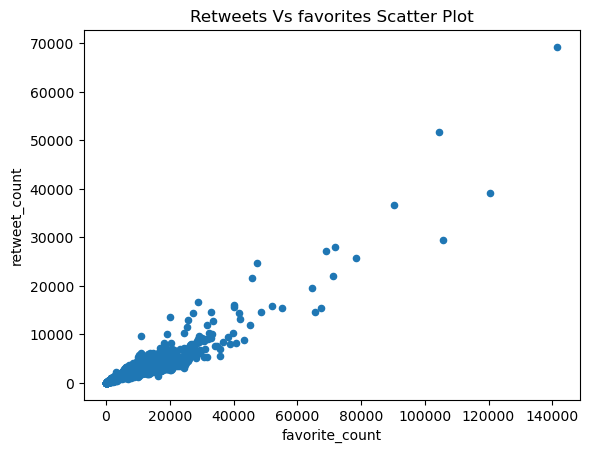

In [92]:
plot_scatter(twitter,'favorite_count','retweet_count','Retweets Vs favorites Scatter Plot')

**Insight:**

    Favourite Counts and Retweet counts have a positive correlation. This was also seen in the dog breed vs (favourite
    count/retweet count) assesment as the most favourited breed was also the most retweeted breed

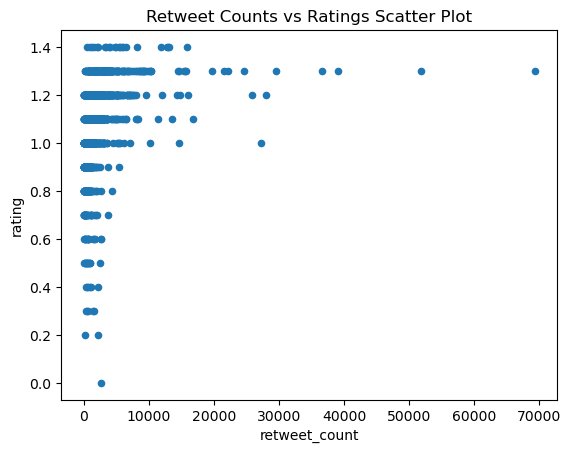

In [93]:
plot_scatter(twitter,'retweet_count','rating','Retweet Counts vs Ratings Scatter Plot')

**Insight:**

    The highest ratings do not receive the most retweets.

#### Q4. What is the common dog stage?

In [94]:
twitter['dog_stages'].value_counts()

pupper          165
doggo            51
puppo            20
floofer           7
doggopupper       6
doggopuppo        1
doggofloofer      1
Name: dog_stages, dtype: int64

**Insight:**

    pupper is the most common dog stage.

#### Q5. Is the most common stage also the highest rated?

dog_stages
floofer    1.200000
puppo      1.195000
doggo      1.186275
pupper     1.084242
Name: rating, dtype: float64


Text(0.5, 1.0, 'Dog Stages Average Rating')

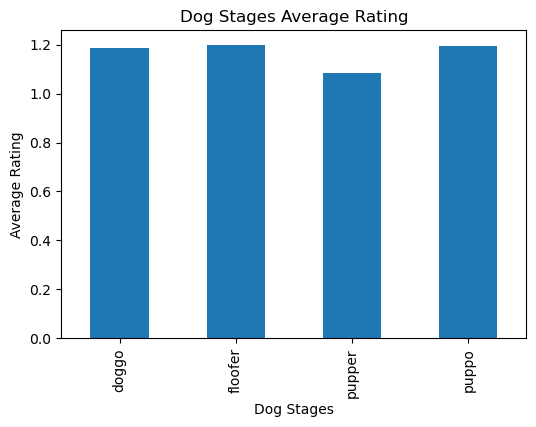

In [95]:
index2 = twitter['dog_stages'].value_counts().index.tolist()[0:4]
filtered2 = twitter[twitter['dog_stages'].isin(index2)]
diagram2 = filtered2.groupby(['dog_stages'])['rating'].mean()
print(diagram2.sort_values(ascending=False))
diagram2.plot.bar(figsize=(6,4))
plt.xlabel('Dog Stages')
plt.ylabel('Average Rating')
plt.title('Dog Stages Average Rating')


**Insight:**

    Floofer is the highest rated dog stage and Pupper being the most common dog stage is the least rated